In [23]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from file_process import process_genre_pronoun
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from scipy.stats import t
from scipy.stats import f


In [2]:
chinese_path = "../data/chinese"  # ← Change to your folder path
english_path = "../data/english"

chinese_df = process_genre_pronoun(chinese_path,lang="ch")
english_df = process_genre_pronoun(english_path,lang="en")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache



Processing genre: history_fiction


Loading model cost 0.422 seconds.
Prefix dict has been built successfully.


  Success: 1. 长安十二时辰 (马伯庸) (Z-Library).txt                    
  Success: 10. 历史的裂变：中国历史上的十三场政变（畅销书《大唐兴亡三百年》作者王觉仁力作，用小说笔法，讲述 
  Success: 2. 风起陇西 (马伯庸 [马伯庸]) (Z-Library).txt                
  Success: 3. 隋乱 (酒徒) (Z-Library).txt                         
  Success: 4. 新宋 (阿越) (Z-Library).txt                         
  Success: 5. 步步生莲 (月关) (Z-Library).txt                       
  Success: 6. 宰执天下 (cuslaa) (Z-Library).txt                   
  Success: 7. 窃明 (灰熊猫) (Z-Library).txt                        
  Success: 8. 四时歌：骑桶人自选集 (骑桶人) (Z-Library).txt                
  Success: 9. 辛亥：计划外革命 (雪珥) (Z-Library).txt                   
  Success: 东宫.txt                                             
  Success: 后宫：甄嬛传.txt                                         
  Success: 将进酒-唐酒卿.txt                                        
  Success: 帝王业.txt                                            
  Success: 日曜卷·青天寨.txt                                        
  Success: 琅琊榜之风起长林.txt                                

In [33]:
chinese_df

,pronoun_ratio_1,pronoun_ratio_2,pronoun_ratio_3,pronoun_ratio_singular,pronoun_ratio_plural,book,genre,filepath,lang
0,0.222157,0.168007,0.609837,0.131000,0.028848,1. 长安十二时辰 (马伯庸) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\1. 长安十二时辰 (马伯庸...,chinese
1,0.259043,0.097783,0.643174,0.133956,0.032905,10. 历史的裂变：中国历史上的十三场政变（畅销书《大唐兴亡三百年》作者王觉仁力作，用小说笔...,history_fiction,../data/chinese\history_fiction\10. 历史的裂变：中国历史...,chinese
2,0.295451,0.187891,0.516658,0.157111,0.063420,2. 风起陇西 (马伯庸 [马伯庸]) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\2. 风起陇西 (马伯庸 [...,chinese
3,0.362981,0.148945,0.488073,0.143120,0.053739,3. 隋乱 (酒徒) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\3. 隋乱 (酒徒) (Z-...,chinese
4,0.295258,0.093543,0.611199,0.166192,0.026394,4. 新宋 (阿越) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\4. 新宋 (阿越) (Z-...,chinese
...,...,...,...,...,...,...,...,...,...
79,0.531544,0.145504,0.322952,0.375499,0.122504,球状闪电（没有《球状闪电》，就没有后来的《三体》《三体》前传，刘慈欣三大长篇作品之一！《三体...,scifi,../data/chinese\scifi\球状闪电（没有《球状闪电》，就没有后来的《三体》...,chinese
80,0.270731,0.164674,0.564595,0.191531,0.038424,类人 (王晋康) (Z-Library).txt,scifi,../data/chinese\scifi\类人 (王晋康) (Z-Library).txt,chinese
81,0.422726,0.105134,0.472140,0.290825,0.082229,红色海洋 (韩松 [韩松]) (Z-Library).txt,scifi,../data/chinese\scifi\红色海洋 (韩松 [韩松]) (Z-Librar...,chinese
82,0.254600,0.141472,0.603928,0.115365,0.041522,荒潮 (陈楸帆) (Z-Library).txt,scifi,../data/chinese\scifi\荒潮 (陈楸帆) (Z-Library).txt,chinese


In [30]:
print(f'Chinese 1st Pronoun ratio:{chinese_df["pronoun_ratio_1"].mean()}')
print(f'Chinese 2nd Pronoun ratio:{chinese_df["pronoun_ratio_2"].mean()}')
print(f'Chinese 3rd Pronoun ratio:{chinese_df["pronoun_ratio_3"].mean()}')

Chinese 1st Pronoun ratio:0.3839528061532079
Chinese 2nd Pronoun ratio:0.17596914383792817
Chinese 3rd Pronoun ratio:0.4400780500088639


In [32]:
english_df

,pronoun_ratio_1,pronoun_ratio_2,pronoun_ratio_3,pronoun_ratio_singular,pronoun_ratio_plural,book,genre,filepath,lang
0,0.095307,0.080349,0.824344,0.062228,0.033080,All the Light We Cannot See - Anthony Doerr.txt,history_fiction,../data/english\history_fiction\All the Light ...,english
1,0.085829,0.043862,0.870310,0.070091,0.015738,Atonement (Ian McEwan) (Z-Library).txt,history_fiction,../data/english\history_fiction\Atonement (Ian...,english
2,0.409956,0.107793,0.482251,0.356791,0.053165,Boleyn 1 The Other Boleyn Girl (Philippa Grego...,history_fiction,../data/english\history_fiction\Boleyn 1 The O...,english
3,0.190331,0.144381,0.665288,0.158053,0.032278,Bring Up the Bodies - Hilary Mantel.txt,history_fiction,../data/english\history_fiction\Bring Up the B...,english
4,0.164226,0.117651,0.718123,0.134101,0.030124,Emperor the Gates of Rome (Conn Iggulden) (Z-L...,history_fiction,../data/english\history_fiction\Emperor the Ga...,english
...,...,...,...,...,...,...,...,...,...
79,0.245176,0.154353,0.600471,0.179361,0.065815,"The Long Way to a Small, Angry Planet - Becky ...",scifi,"../data/english\scifi\The Long Way to a Small,...",english
80,0.488338,0.080906,0.430755,0.415690,0.072648,The Martian - Andy Weir.txt,scifi,../data/english\scifi\The Martian - Andy Weir.txt,english
81,0.141211,0.136520,0.722268,0.102511,0.038700,The Peripheral - William Gibson.txt,scifi,../data/english\scifi\The Peripheral - William...,english
82,0.444270,0.043385,0.512345,0.380667,0.063603,Uprooted - Naomi Novik.txt,scifi,../data/english\scifi\Uprooted - Naomi Novik.txt,english


In [35]:
chi_std = chinese_df[["pronoun_ratio_1", "pronoun_ratio_2", "pronoun_ratio_3"]].std()

In [34]:
print(f'English 1st Pronoun ratio:{english_df["pronoun_ratio_1"].mean()}')
print(f'English 2nd Pronoun ratio:{english_df["pronoun_ratio_2"].mean()}')
print(f'English 3rd Pronoun ratio:{english_df["pronoun_ratio_3"].mean()}')

English 1st Pronoun ratio:0.34636453626078445
English 2nd Pronoun ratio:0.10408158954725051
English 3rd Pronoun ratio:0.549553874191965


In [27]:
def hotelling_t2(X, Y):
    n1, p = X.shape
    n2, _ = Y.shape

    mean1 = X.mean(axis=0)
    mean2 = Y.mean(axis=0)

    S1 = np.cov(X, rowvar=False)
    S2 = np.cov(Y, rowvar=False)

    Sp = ((n1 - 1) * S1 + (n2 - 1) * S2) / (n1 + n2 - 2)

    diff = mean1 - mean2
    T2 = (n1 * n2) / (n1 + n2) * diff @ np.linalg.inv(Sp) @ diff

    # Convert T² → F
    F_stat = (n1 + n2 - p - 1) * T2 / ((n1 + n2 - 2) * p)
    df1 = p
    df2 = n1 + n2 - p - 1

    p_value = 1 - f.cdf(F_stat, df1, df2)
    return p_value

In [21]:
chinese_x = chinese_df[["pronoun_ratio_1", "pronoun_ratio_2", "pronoun_ratio_3"]].to_numpy()
english_x = english_df[["pronoun_ratio_1", "pronoun_ratio_2", "pronoun_ratio_3"]].to_numpy()

In [28]:
p_value = hotelling_t2(chinese_x, english_x)

In [29]:
p_value

1.1102230246251565e-16

In [7]:
chinese_df['lang'] = 'chinese'
english_df['lang'] = 'english'
combined_df = pd.concat([chinese_df, english_df], ignore_index=True)

In [8]:
combined_df

,pronoun_ratio_1,pronoun_ratio_2,pronoun_ratio_3,pronoun_ratio_singular,pronoun_ratio_plural,book,genre,filepath,lang
0,0.222157,0.168007,0.609837,0.131000,0.028848,1. 长安十二时辰 (马伯庸) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\1. 长安十二时辰 (马伯庸...,chinese
1,0.259043,0.097783,0.643174,0.133956,0.032905,10. 历史的裂变：中国历史上的十三场政变（畅销书《大唐兴亡三百年》作者王觉仁力作，用小说笔...,history_fiction,../data/chinese\history_fiction\10. 历史的裂变：中国历史...,chinese
2,0.295451,0.187891,0.516658,0.157111,0.063420,2. 风起陇西 (马伯庸 [马伯庸]) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\2. 风起陇西 (马伯庸 [...,chinese
3,0.362981,0.148945,0.488073,0.143120,0.053739,3. 隋乱 (酒徒) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\3. 隋乱 (酒徒) (Z-...,chinese
4,0.295258,0.093543,0.611199,0.166192,0.026394,4. 新宋 (阿越) (Z-Library).txt,history_fiction,../data/chinese\history_fiction\4. 新宋 (阿越) (Z-...,chinese
...,...,...,...,...,...,...,...,...,...
163,0.245176,0.154353,0.600471,0.179361,0.065815,"The Long Way to a Small, Angry Planet - Becky ...",scifi,"../data/english\scifi\The Long Way to a Small,...",english
164,0.488338,0.080906,0.430755,0.415690,0.072648,The Martian - Andy Weir.txt,scifi,../data/english\scifi\The Martian - Andy Weir.txt,english
165,0.141211,0.136520,0.722268,0.102511,0.038700,The Peripheral - William Gibson.txt,scifi,../data/english\scifi\The Peripheral - William...,english
166,0.444270,0.043385,0.512345,0.380667,0.063603,Uprooted - Naomi Novik.txt,scifi,../data/english\scifi\Uprooted - Naomi Novik.txt,english


In [9]:
combined_df.to_csv('results/pronoun_ratios.csv', index=False) 

In [10]:
features = ['pronoun_ratio_1', 'pronoun_ratio_2', 'pronoun_ratio_3','pronoun_ratio_singular','pronoun_ratio_plural']

In [11]:
feature_name_map = {
    'pronoun_ratio_1': '1st Person Pronoun Ratio',
    'pronoun_ratio_2': '2nd Person Pronoun Ratio',
    'pronoun_ratio_3': '3rd Person Pronoun Ratio',
    'pronoun_ratio_singular': 'Singular Pronoun Ratio',
    'pronoun_ratio_plural': 'Plural Pronoun Ratio'
}

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10036\808526306.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10036\808526306.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10036\808526306.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


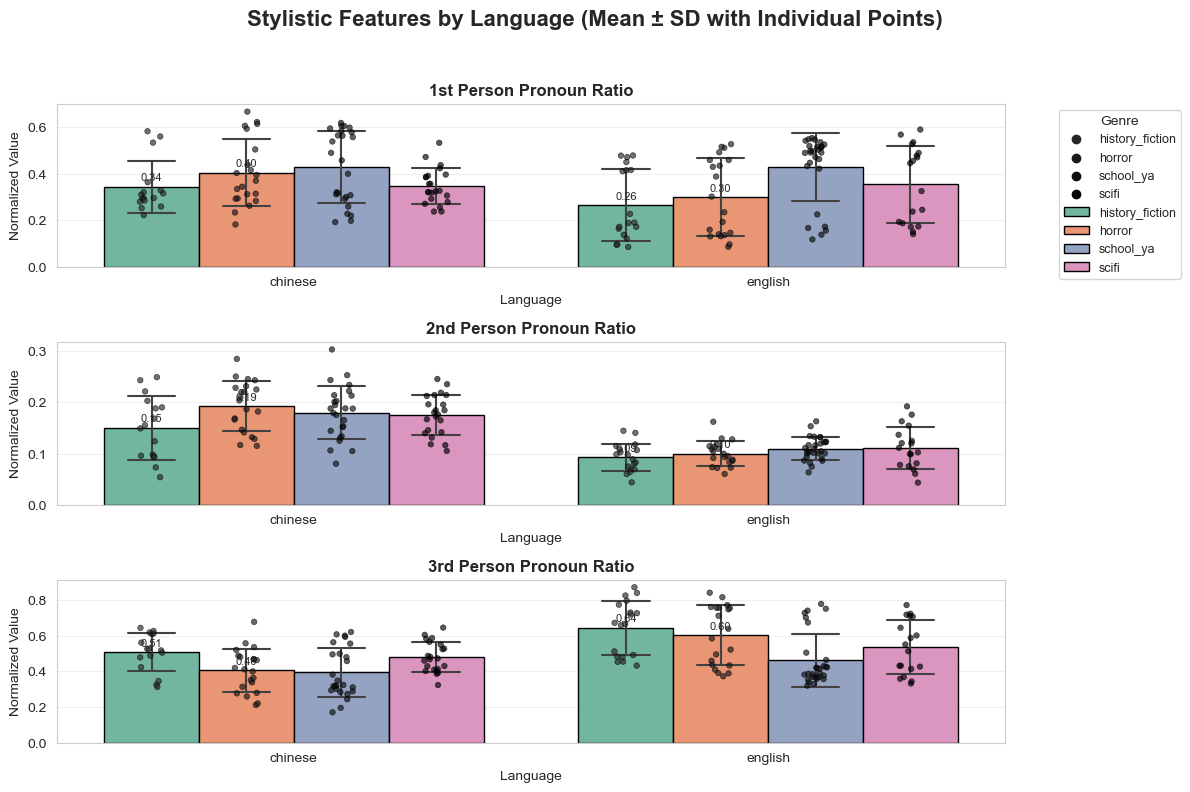

In [17]:
# Assuming combined_df, features, feature_name_map are already defined

plt.figure(figsize=(12, 12))
sns.set_style("whitegrid")

# Example for one feature — repeat in a loop for all features if desired
for idx, feature in enumerate(features[:3]):  
    display_name = feature_name_map.get(feature, feature)
    norm_feature = f"{feature}"
    
    ax = plt.subplot(5, 1, idx + 1)  # Or use a single plot if preferred
    
    # Barplot: mean with SD error bars, grouped by language, split by genre (dodged)
    sns.barplot(
        data=combined_df,
        x="lang",          # Now language on x-axis
        y=norm_feature,
        hue="genre",       # Genres mixed/dodged side-by-side
        ax=ax,
        ci="sd",
        capsize=0.1,
        errwidth=1.5,
        palette="Set2",
        edgecolor='black',
        linewidth=1
    )
    
    # Stripplot overlay: individual data points, dodged by hue
    sns.stripplot(
        data=combined_df,
        x="lang",
        y=norm_feature,
        hue="genre",
        ax=ax,
        dodge=True,
        jitter=True,
        size=4,
        alpha=0.65,
        edgecolor="black",
        linewidth=0.5,
        palette="dark:black"
    )
    
    # Value labels on bars
    for container in ax.containers[:len(ax.containers)//2]:  # Only label bars (avoid double-labeling)
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8)
    
    ax.set_title(f"{display_name}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Language", fontsize=10)
    ax.set_ylabel("Normalized Value", fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    # Legend handling
    if idx == 0:
        ax.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    else:
        ax.legend().remove()

plt.suptitle("Stylistic Features by Language (Mean ± SD with Individual Points)", 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10036\2827142125.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10036\2827142125.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


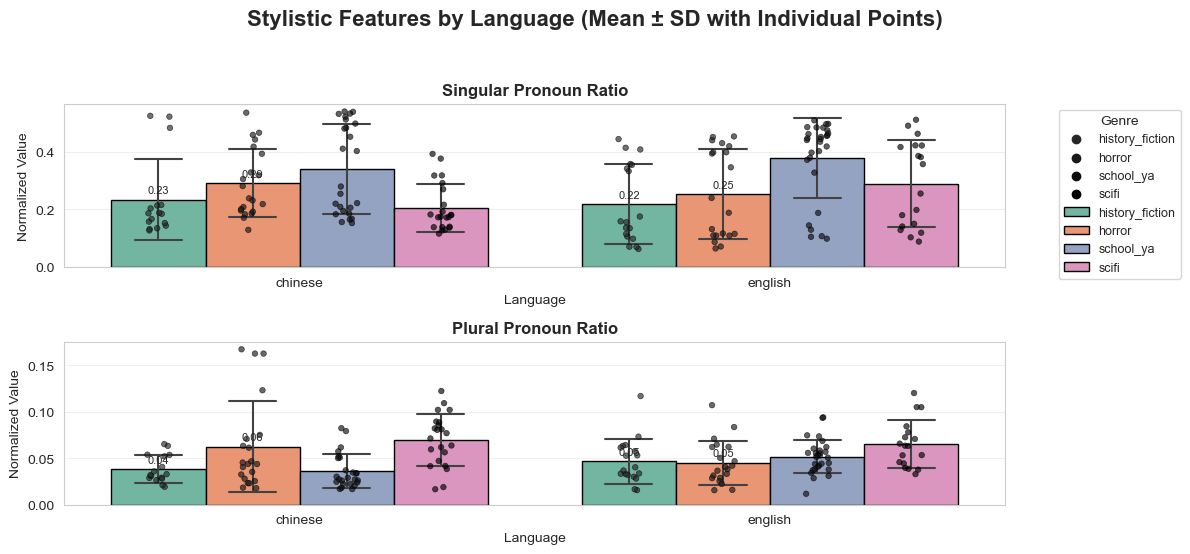

In [18]:
# Assuming combined_df, features, feature_name_map are already defined

plt.figure(figsize=(12, 12))
sns.set_style("whitegrid")

# Example for one feature — repeat in a loop for all features if desired
for idx, feature in enumerate(features[3:]):  
    display_name = feature_name_map.get(feature, feature)
    norm_feature = f"{feature}"
    
    ax = plt.subplot(5, 1, idx + 1)  # Or use a single plot if preferred
    
    # Barplot: mean with SD error bars, grouped by language, split by genre (dodged)
    sns.barplot(
        data=combined_df,
        x="lang",          # Now language on x-axis
        y=norm_feature,
        hue="genre",       # Genres mixed/dodged side-by-side
        ax=ax,
        ci="sd",
        capsize=0.1,
        errwidth=1.5,
        palette="Set2",
        edgecolor='black',
        linewidth=1
    )
    
    # Stripplot overlay: individual data points, dodged by hue
    sns.stripplot(
        data=combined_df,
        x="lang",
        y=norm_feature,
        hue="genre",
        ax=ax,
        dodge=True,
        jitter=True,
        size=4,
        alpha=0.65,
        edgecolor="black",
        linewidth=0.5,
        palette="dark:black"
    )
    
    # Value labels on bars
    for container in ax.containers[:len(ax.containers)//2]:  # Only label bars (avoid double-labeling)
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8)
    
    ax.set_title(f"{display_name}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Language", fontsize=10)
    ax.set_ylabel("Normalized Value", fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    # Legend handling
    if idx == 0:
        ax.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    else:
        ax.legend().remove()

plt.suptitle("Stylistic Features by Language (Mean ± SD with Individual Points)", 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [34]:
#access student t criteria
freedom_degree = len(combined_df) - 2
alpha = 0.05
t_criteria = t.ppf(1 - alpha, freedom_degree)
print(f'The t criteria at alpha={alpha} and freedom degree={freedom_degree} is {t_criteria}')

The t criteria at alpha=0.05 and freedom degree=174 is 1.653658016514993


In [28]:
ch_2rd_mean, ch_2rd_std = combined_df[combined_df['lang']=='chinese']['pronoun_ratio_2'].mean(), combined_df[combined_df['lang']=='chinese']['pronoun_ratio_2'].std()
en_2rd_mean, en_2rd_std = combined_df[combined_df['lang']=='english']['pronoun_ratio_2'].mean(), combined_df[combined_df['lang']=='english']['pronoun_ratio_2'].std()

In [29]:
num_chinese = len(combined_df[combined_df['lang']=='chinese'])
num_english = len(combined_df[combined_df['lang']=='english'])

In [36]:
two_rd_diff = ch_2rd_mean - en_2rd_mean
two_rd_std_power = ((num_chinese-1)*ch_2rd_std**2 + (num_english-1)*en_2rd_std**2)/(num_chinese + num_english -2)

In [37]:
t_score = two_rd_diff/np.sqrt(two_rd_std_power*(1/num_chinese + 1/num_english))
t_score

11.06508829081348

In [39]:
p = t.sf(t_score, freedom_degree)
p

3.454238154787898e-22

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\1643909368.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\1643909368.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17684\1643909368.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


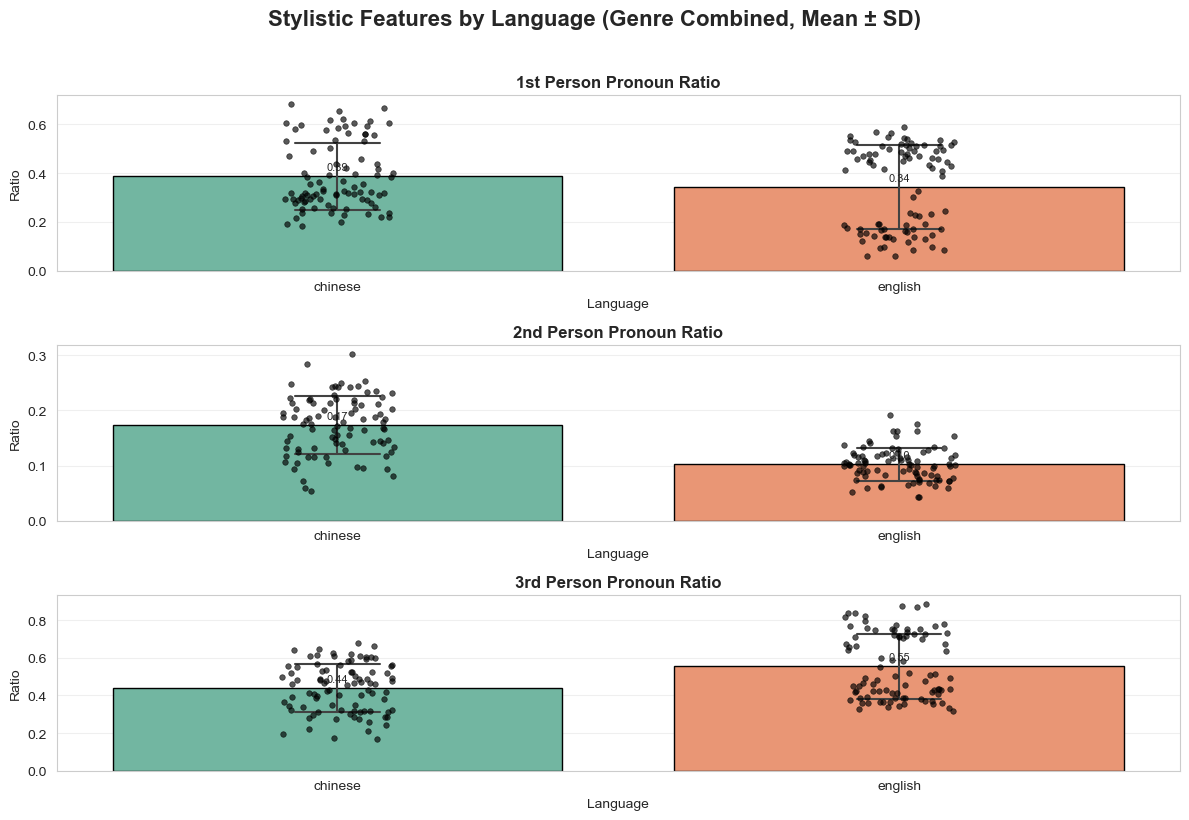

In [41]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

for idx, feature in enumerate(features[:3]):  # first 3 features as example
    display_name = feature_name_map.get(feature, feature)
    norm_feature = feature

    ax = plt.subplot(3, 1, idx + 1)

    # Barplot: mean ± SD by language (genre combined)
    sns.barplot(
        data=combined_df,
        x="lang",
        y=norm_feature,
        ax=ax,
        ci="sd",
        capsize=0.15,
        errwidth=1.5,
        palette="Set2",
        edgecolor="black",
        linewidth=1
    )

    # Stripplot: individual points (all genres mixed)
    sns.stripplot(
        data=combined_df,
        x="lang",
        y=norm_feature,
        ax=ax,
        jitter=True,
        size=4,
        alpha=0.65,
        edgecolor="black",
        linewidth=0.5,
        color="black"
    )

    # Value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3, fontsize=8)

    ax.set_title(display_name, fontsize=12, fontweight="bold")
    ax.set_xlabel("Language", fontsize=10)
    ax.set_ylabel("Ratio", fontsize=10)

    ax.grid(True, alpha=0.3, axis="y")
    ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5, alpha=0.5)

plt.suptitle(
    "Stylistic Features by Language (Genre Combined, Mean ± SD)",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.show()
